# Letramentro Digital - Mini-projeto
<a target="_blank" href="https://colab.research.google.com/github/lucasmatnibezerra/Letramento-Digital-Analise-De-Dados/blob/main/Análise_de_dados.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

Link github: https://github.com/lucasmatnibezerra/Letramento-Digital-Analise-De-Dados

# Aulas 8, 9 e 10

# Organização desta Etapa

Nesta última etapa vamos desenvolver juntos um pequeno projeto de análise de dados. O objetivo é colocar em prática os conhecimentos adquiridos durante o curso de Python e nos preparar para os próximos módulos.

Abaixo o cronograma da última etapa:

|Dia|Assunto|
|---|---|
|06/10|Discussão sobre Análise Exploratória de Dados e Definição do Conjunto de Dados|
|08/10|Hands-on sobre os dados|
|13/10|Apresentação de projetos e encerramento|

# Análise Exploratória de Dados


A Análise Exploratória de Dados é uma técnica usada por cientistas de dados para resumir as principais características de um conjunto de dados e verificar a qualidade destes. Trata-se então da primeira atividade a ser feita em um projeto de Inteligência Artificial. Afinal, se os dados não forem corretamente tratados, os modelos de Inteligência Artificial terão dificuldades em fazer inferências. Isso é resumido em uma máxima: *"Garbage In, Garbage Out"*.

Análise Exploratória de Dados emprega estatística e outros métodos de visualização de dados para identificar padrões gerais, detectar anomalias nos dados e descobrir relacionamentos prévios que auxiliem os processos subsequentes.

A Análise Exploratória de Dados envolve 3 etapas:

1. **Entrada de dados**
2. **Execução da análise estatística**
3. **Interpretação de resultados**

### Variáveis

Dados costumam ser amostras coletadas sobre um determinado problema de interesse (ex: determinar se os estudantes da UFPA são obesos). Contudo, o processo de coleta contempla não apenas a informação de interesse imediato (ex: peso dos estudantes), mas diversas outras informações que auxiliarão no entendimento desta característica (ex: sexo, altura, idade, hábitos etc).

Cada uma das características da população amostrada (ex: peso, altura, sexo,idade etc), é denominada de uma **variável**. E nos conjuntos de dados estas variáveis são representadas em colunas.

As variáveis podem assumir diferentes valores, que basicamente podem ser separados em:

- **Quantitativos ou numéricos**
- **Qualitativos ou categóricos**

As variáveis numéricas podem ser:

- **Discretas**: assumem apenas valores inteiros. Ex.: número de irmãos, número de passageiros
- **Contínuas**: assumem qualquer valor no intervalo dos números reais. Ex.: peso, altura

As variáveis categóricas podem ser:

- **Nominais**: quando as categorias não possuem uma ordem natural. Ex.: nomes, cores, sexo
- **Ordinais**: quando as categorias podem ser ordenadas. Ex.: tamanho (pequeno, médio, grande), classe social (baixa, média, alta), grau de instrução (básico, médio, graduação, pós-graduação)

### Análise Univariada


A **análise univariada** é o primeiro passo na análise exploratória de dados, focando no estudo de **uma variável por vez**. Este tipo de análise nos permite compreender o comportamento individual de cada variável.

Para esta análise pode-se:

1. **Usar recursos descritivos** que resumam a variável:
   - **Tabelas** de frequência
   - **Gráficos** apropriados para o tipo de variável
   - **Medidas** de posição, dispersão e forma

2. **Analisar o comportamento** da variável:
   - Entender a **distribuição** dos valores
   - Identificar **padrões** e **anomalias**
   - Detectar valores discrepantes (**outliers**)

Neste notebook, utilizaremos **Seaborn** e **Matplotlib** para criar visualizações que tornem os conceitos estatísticos mais claros e intuitivos.


In [ ]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
# Suprimir avisos futuros irrelevantes para a aula
warnings.filterwarnings('ignore', category=FutureWarning)


In [ ]:
# Configurações para visualizações
plt.style.use('default')
sns.set_style('whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print('Configurações de visualização definidas!')

Configurações de visualização definidas!


### Carregando os Dados

Agora vamos carregar os datasets que usaremos durante nossa análise.

In [ ]:
# Carregando o dataset kidsfeet (sem pré-processamento)
colunas_kids = ["MesNascimento", "AnoNascimento", "Comprimento", "Largura", "Sexo", "Pe", "DominanciaMao"]
url_kids = 'https://raw.githubusercontent.com/lucasmatnibezerra/Letramento-Digital-Analise-De-Dados/main/kidsfeet.dat.txt'
kids = pd.read_csv(url_kids, sep=r'\s+', header=None, names=colunas_kids)
print('Dataset kidsfeet carregado!')
print(f'Total de registros: {len(kids)}')
print(f'Colunas disponíveis: {list(kids.columns)}')

Dataset kidsfeet carregado!
Total de registros: 41
Colunas disponíveis: ['MesNascimento', 'AnoNascimento', 'Comprimento', 'Largura', 'Sexo', 'Pe', 'DominanciaMao']


In [ ]:
# Visualizando as primeiras linhas do dataset kidsfeet
print('Primeiras linhas do dataset kidsfeet:')
print(kids.head())

Primeiras linhas do dataset kidsfeet:
   MesNascimento  AnoNascimento  Comprimento  Largura Sexo Pe DominanciaMao
0              5             88         22.4      8.4    B  L             R
1             10             87         23.4      8.8    B  L             L
2             12             87         22.5      9.7    B  R             R
3              1             88         23.2      9.8    B  L             R
4              2             88         23.1      8.9    B  L             R


## Visualizando os dados

Vamos usar gráficos para entender melhor nossos dados!

- **Gráficos** ajudam a enxergar padrões, tendências e possíveis problemas nos dados.
- Tipos comuns:
  - Gráfico de barras (categorias)
  - Histograma (distribuição de valores numéricos)
  - Histograma condicional (distribuição considerando uma condição)

In [ ]:
# Informações básicas sobre o dataset kidsfeet
print(f'Dataset possui {kids.shape[0]} registros e {kids.shape[1]} colunas')
print(f'Colunas: {list(kids.columns)}')

# Tipos de dados e estatísticas básicas
print('\nTipos de dados:')
print(kids.dtypes)
print('\nPrimeiras 5 linhas:')
kids.head()

Dataset possui 41 registros e 7 colunas
Colunas: ['MesNascimento', 'AnoNascimento', 'Comprimento', 'Largura', 'Sexo', 'Pe', 'DominanciaMao']

Tipos de dados:
MesNascimento      int64
AnoNascimento      int64
Comprimento      float64
Largura          float64
Sexo              object
Pe                object
DominanciaMao     object
dtype: object

Primeiras 5 linhas:


,MesNascimento,AnoNascimento,Comprimento,Largura,Sexo,Pe,DominanciaMao
0,5,88,22.4,8.4,B,L,R
1,10,87,23.4,8.8,B,L,L
2,12,87,22.5,9.7,B,R,R
3,1,88,23.2,9.8,B,L,R
4,2,88,23.1,8.9,B,L,R


## Agora vamos criar gráficos para entender melhor a distribuição dos dados.

### Entendendo Diferentes Tipos de Gráficos

Agora que estamos trabalhando com o conjunto de dados **kidsfeet**, queremos entender como variáveis simples (comprimento e largura dos pés, sexo, pé medido, mês e ano de nascimento) se distribuem e se relacionam.

### **Gráfico de Barras**
Mostra as contagens de cada categoria. No nosso caso, podemos ver:
- Quantas observações temos de cada **sexo** (B = Boy / G = Girl)
- Quantas medições são de **pé esquerdo** ou **pé direito** (L/R)
- Como os **meses** ou **anos** de nascimento se distribuem

Esse gráfico ajuda a responder: existe equilíbrio entre meninos e meninas? Há mais medições do pé esquerdo ou direito?

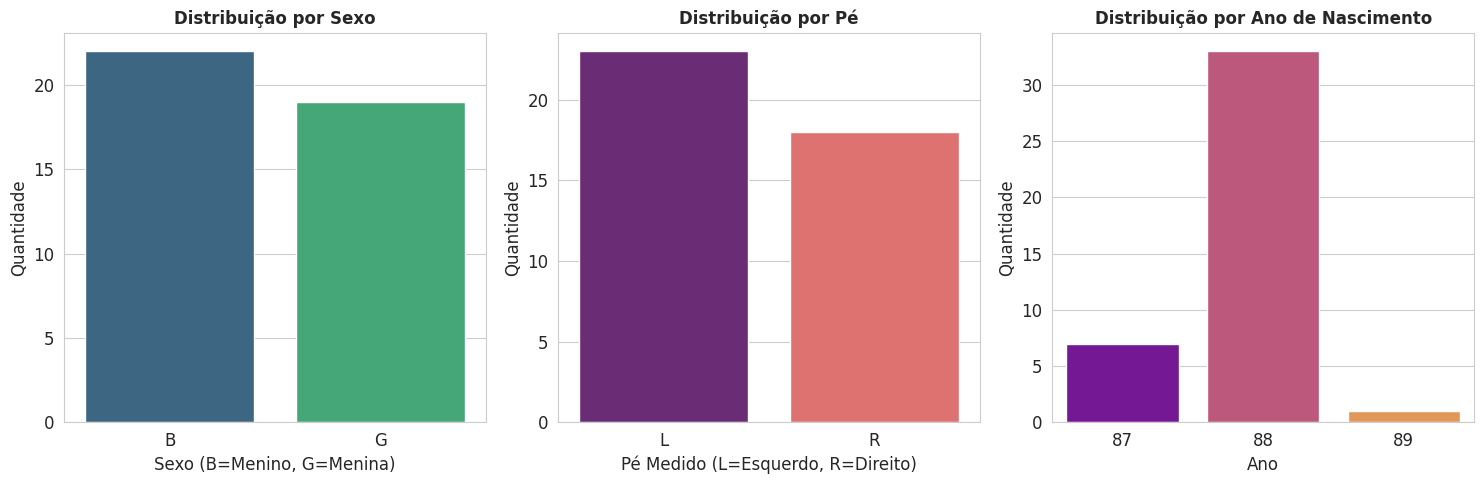

In [ ]:
# Gráficos de distribuição - Parte 1 (adaptado para kidsfeet com nomes em português)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 5))

# Gráfico de barras: distribuição por sexo
plt.subplot(1,3,1)
sexo_counts = kids['Sexo'].value_counts()
sns.barplot(x=sexo_counts.index, y=sexo_counts.values, palette='viridis')
plt.title('Distribuição por Sexo', fontsize=12, fontweight='bold')
plt.xlabel('Sexo (B=Menino, G=Menina)')
plt.ylabel('Quantidade')

# Gráfico de barras: distribuição por pé (Pe)
plt.subplot(1,3,2)
pe_counts = kids['Pe'].value_counts()
sns.barplot(x=pe_counts.index, y=pe_counts.values, palette='magma')
plt.title('Distribuição por Pé', fontsize=12, fontweight='bold')
plt.xlabel('Pé Medido (L=Esquerdo, R=Direito)')
plt.ylabel('Quantidade')

# Gráfico de barras: distribuição por ano de nascimento
plt.subplot(1,3,3)
ano_counts = kids['AnoNascimento'].value_counts().sort_index()
sns.barplot(x=ano_counts.index.astype(str), y=ano_counts.values, palette='plasma')
plt.title('Distribuição por Ano de Nascimento', fontsize=12, fontweight='bold')
plt.xlabel('Ano')
plt.ylabel('Quantidade')

plt.tight_layout()

### **Histogramas**

Os histogramas mostram como variáveis numéricas (ex.: **Comprimento** e **Largura**) estão distribuídas. Eles dividem os valores em faixas (bins) e contam quantas observações caem em cada faixa. A linha suave (KDE) ajuda a visualizar a forma geral da distribuição.

O que observar:
- Existe simetria ou a distribuição é inclinada para algum lado?
- Há possíveis valores atípicos (muito grandes ou pequenos) para comprimento ou largura?
- Os comprimentos parecem concentrados em torno de um valor típico?

Esses gráficos nos ajudam a entender se uma medida é relativamente homogênea entre os alunos ou se há muita variação.

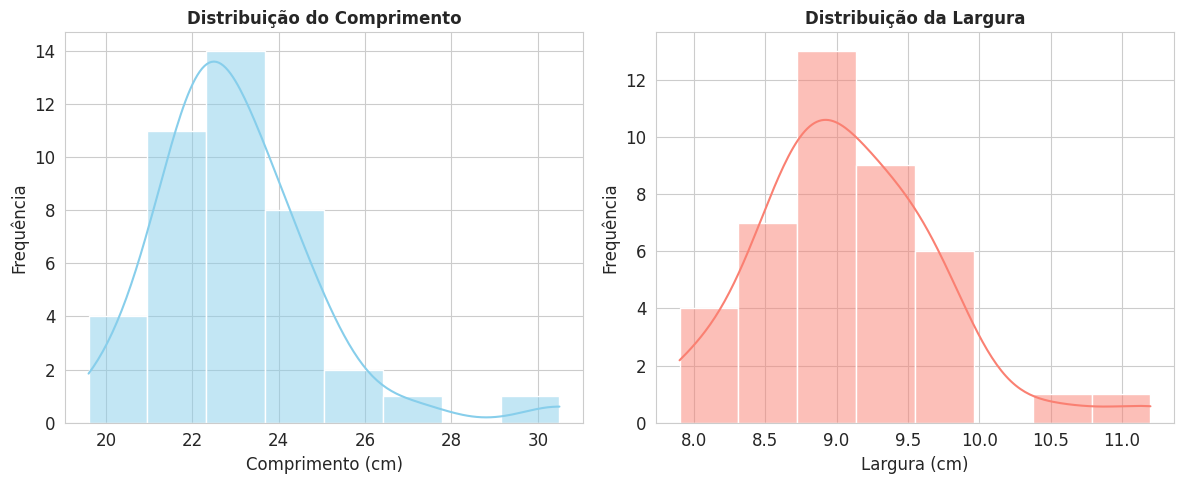

In [ ]:
# Histogramas de Comprimento e Largura (kidsfeet)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(data=kids, x='Comprimento', bins=8, kde=True, color='skyblue')
plt.title('Distribuição do Comprimento', fontsize=12, fontweight='bold')
plt.xlabel('Comprimento (cm)')
plt.ylabel('Frequência')

plt.subplot(1,2,2)
sns.histplot(data=kids, x='Largura', bins=8, kde=True, color='salmon')
plt.title('Distribuição da Largura', fontsize=12, fontweight='bold')
plt.xlabel('Largura (cm)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

### Desvendando os Boxplots (Gráficos de Caixa)

O boxplot é excelente para visualizar rapidamente a distribuição de **Comprimento** ou **Largura** dos pés.

Como ler:
- A **linha dentro da caixa**: mediana (valor central)
- A **caixa**: intervalo onde estão os 50% valores centrais (Q1 a Q3)
- Os **"bigodes"**: alcance dos valores considerados típicos
- Pontos isolados além dos bigodes: possíveis outliers (valores incomuns)

Por que usar aqui?
- Comparar `Comprimento` entre meninos e meninas
- Ver se `Largura` tem mais variabilidade que `Comprimento`
- Avaliar rapidamente dispersão e simetria das medidas

Boxplots lado a lado ajudam a responder: os pés dos meninos têm comprimento sistematicamente maior? A largura difere muito entre os grupos?

Boxplots – Medidas dos Pés

Nesta seção aplicamos o conceito de boxplot para **Comprimento** e **Largura**.

Observe:
- **Mediana**: valor típico do conjunto
- **Variação**: extensão da caixa indica quão espalhados estão os dados
- **Outliers**: possíveis valores incomuns que podem representar variações biológicas naturais

O objetivo é investigar se existe assimetria ou presença de medidas fora do padrão esperado para a turma.

**Nota:** A presença de pontos além dos "bigodes" não implica erro — podem ser apenas crianças com pés proporcionalmente maiores ou menores.

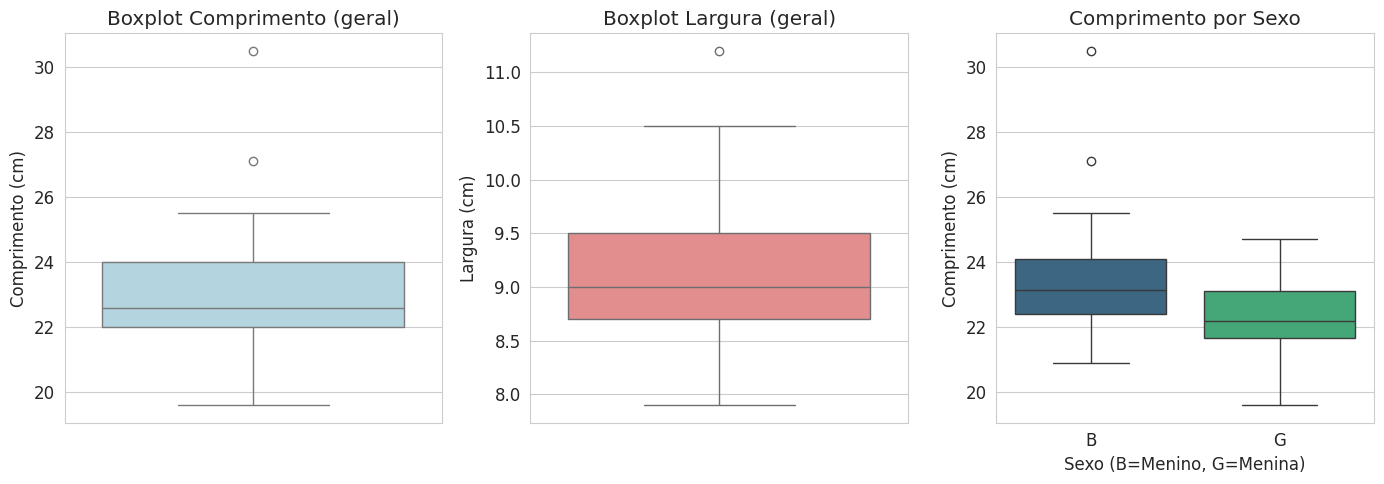

In [ ]:
# Boxplots de medidas dos pés (Comprimento e Largura) no dataset kidsfeet
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 5))

# Boxplot geral de Comprimento
plt.subplot(1,3,1)
sns.boxplot(y=kids['Comprimento'], color='lightblue')
plt.title('Boxplot Comprimento (geral)')
plt.ylabel('Comprimento (cm)')

# Boxplot geral de Largura
plt.subplot(1,3,2)
sns.boxplot(y=kids['Largura'], color='lightcoral')
plt.title('Boxplot Largura (geral)')
plt.ylabel('Largura (cm)')

# Boxplot Comprimento por Sexo
plt.subplot(1,3,3)
sns.boxplot(data=kids, x='Sexo', y='Comprimento', palette='viridis')
plt.title('Comprimento por Sexo')
plt.xlabel('Sexo (B=Menino, G=Menina)')
plt.ylabel('Comprimento (cm)')

plt.tight_layout()
plt.show()

Gráfico de Barras – Distribuição por Mês de Nascimento

Mostra quantas crianças nasceram em cada mês. Útil para:
- Ver se há concentração em determinados meses
- Identificar possíveis sazonalidades da amostra (meses com menos alunos)

Isso ajuda a entender se a amostra é relativamente uniforme ou enviesada para certos períodos do ano.


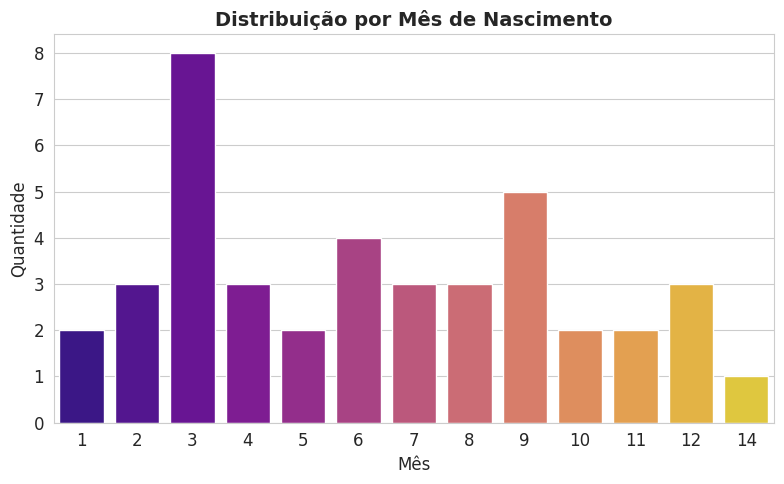

In [ ]:
# Gráfico de barras: distribuição por mês de nascimento (MesNascimento)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
month_counts = kids['MesNascimento'].value_counts().sort_index()
sns.barplot(x=month_counts.index, y=month_counts.values, palette='plasma')
plt.title('Distribuição por Mês de Nascimento', fontsize=14, fontweight='bold')
plt.xlabel('Mês')
plt.ylabel('Quantidade')
plt.tight_layout()
plt.show()

## Resumindo dados em medidas

### Média

A **média aritmética** é a soma de todos os valores dividida pela quantidade de observações:

$$\bar{x} = \frac{\sum_{i=1}^{N}x_i}{N} = \frac{x_1 + x_2 + ... + x_N}{N}$$

Características importantes:

- **Medida de localização**: nos diz onde os dados estão "centrados"
- **Pode não existir no conjunto**: a média pode ser um valor que não aparece nos dados originais
- **Sensível a outliers**: valores extremos podem "puxar" a média para cima ou para baixo

**Efeito de valores extremos sobre a média**

A média de `Comprimento` pode mudar bastante se adicionarmos artificialmente um valor muito alto (ex.: 50 cm). Esse experimento ilustra a sensibilidade da média a outliers.

In [ ]:
# Média de Comprimento e Largura
media_comprimento = kids['Comprimento'].mean()
media_largura = kids['Largura'].mean()
print(f'Média Comprimento: {media_comprimento:.2f} cm')
print(f'Média Largura: {media_largura:.2f} cm')

# Exemplo de impacto de um valor extremo artificial em Comprimento
import numpy as np
comprimento_com_outlier = kids['Comprimento'].tolist() + [50]  # valor extremo artificial
media_com_outlier = np.mean(comprimento_com_outlier)
print(f'Média Comprimento com outlier artificial (50 cm): {media_com_outlier:.2f} cm')
print(f'Diferença: {media_com_outlier - media_comprimento:.2f} cm')

Média Comprimento: 23.02 cm
Média Largura: 9.08 cm
Média Comprimento com outlier artificial (50 cm): 23.66 cm
Diferença: 0.64 cm


### Desvio Padrão

**Problema**: A média nos diz onde os dados estão centralizados, mas **quanto eles variam** ao redor da média?

**Definição Matemática:**

**Desvio Padrão Amostral (usado pelo Pandas):**
$$s = \sqrt{\frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{n-1}}$$

**Passos do cálculo:**
1. Calcular a média: $\bar{x}$
2. Calcular os desvios: $(x_i - \bar{x})$
3. Elevar ao quadrado: $(x_i - \bar{x})^2$
4. Somar todos: $\sum(x_i - \bar{x})^2$
5. Dividir por $(n-1)$: Correção de Bessel
6. Tirar a raiz quadrada: $\sqrt{...}$

**Implementação no Pandas:**
```python
# Pandas usa ddof=1 por padrão (divisão por n-1)
desvio = df['coluna'].std()     # Amostra
desvio_pop = df['coluna'].std(ddof=0)  # População
```

**Interpretação:**
- **Unidade**: mesma dos dados originais
- **Baixo**: dados concentrados perto da média
- **Alto**: dados espalhados da média

In [ ]:
# Calculando estatísticas básicas de Comprimento
media_comp = kids['Comprimento'].mean()
desvio_comp = kids['Comprimento'].std()

within_1sd = kids[(kids.Comprimento > media_comp - desvio_comp) & (kids.Comprimento < media_comp + desvio_comp)]
pct_within = len(within_1sd)/len(kids)*100

print("RESUMO DO COMPRIMENTO DOS PÉS")
print("=" * 40)
print(f"Média: {media_comp:.2f} cm")
print(f"Desvio padrão: {desvio_comp:.2f} cm")
print()
print("O que isso significa na prática:")
print(f"   • Cerca de {pct_within:.1f}% dos comprimentos estão entre {media_comp - desvio_comp:.2f} e {media_comp + desvio_comp:.2f} cm")
print(f"   • Essa é a 'faixa típica' de Comprimento")

RESUMO DO COMPRIMENTO DOS PÉS
Média: 23.02 cm
Desvio padrão: 1.88 cm

O que isso significa na prática:
   • Cerca de 75.6% dos comprimentos estão entre 21.14 e 24.90 cm
   • Essa é a 'faixa típica' de Comprimento


### A "Regra dos 68%" - Um Truque da Natureza

**Você já reparou que a vida tem padrões?**

- A maioria das pessoas tem altura "normal" (nem muito alta, nem muito baixa)
- A maioria dos carros na rua anda na velocidade "normal"
- A maioria dos alunos tira notas "medianas"

Isso acontece em quase tudo na vida! E existe uma regra matemática que explica isso.

**A Regra dos 68% diz assim:**
> "Em coisas que seguem o padrão normal da vida, aproximadamente 68% ficam 'perto' da média"

**"Perto" significa o quê?**
Perto significa dentro de 1 "desvio padrão" - que é como medimos o quanto os dados se espalham.

**Atenção**: Nem todas as variáveis seguem esta regra.


## Variância

### O que é a Variância?

**Problema**: Como medir variabilidade sem depender de unidades?

#### Definição Matemática:

**Variância Amostral (Pandas):**
$$s^2 = \frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{n-1}$$

**Relação com Desvio Padrão:**
$$s^2 = (\text{desvio padrão})^2$$
$$s = \sqrt{s^2}$$

#### Implementação Pandas:
```python
variancia = df['coluna'].var()     # ddof=1
desvio = df['coluna'].std()       # ddof=1
# Relação: variancia = desvio ** 2
```

#### Diferenças Importantes:

| Medida | Unidade | Interpretação |
|--------|---------|----------------|
| **Desvio Padrão** | Mesma dos dados | Fácil de interpretar |
| **Variância** | Quadrado da unidade | Usada em cálculos |

#### Quando Usar:
- **Variância**: Cálculos matemáticos, testes estatísticos
- **Desvio Padrão**: Interpretação e comunicação


In [ ]:
# Variância e relação com desvio padrão (Comprimento)
variancia_comp = kids['Comprimento'].var()
desvio_comp = kids['Comprimento'].std()
print(f"pandas.var(): {variancia_comp:.4f} cm²")
print(f"pandas.std(): {desvio_comp:.4f} cm")
print(f"Relação: std² = ({desvio_comp:.4f})² = {desvio_comp**2:.4f} ≈ var")

pandas.var(): 3.5501 cm²
pandas.std(): 1.8842 cm
Relação: std² = (1.8842)² = 3.5501 ≈ var


### Entendendo a Diferença: Desvio Padrão vs Variância

**Uma analogia para começar:**
Imagine que você quer medir o quão "espalhados" estão os comprimentos dos pés da turma. É como medir a "bagunça" ou "organização" dos dados.

**A variância é o primeiro passo:**
- Mede o quanto cada comprimento se afasta da média
- Elevamos as diferenças ao quadrado para penalizar desvios maiores
- Resultado: se os comprimentos estão em centímetros (cm), a variância fica em cm²

**O desvio padrão é mais intuitivo:**
- É a raiz quadrada da variância
- Volta para a unidade original (cm)
- Podemos dizer: "Os comprimentos típicos variam X cm em torno da média"

**Por que precisamos dos dois?**

**Variância:**
- Essencial em fórmulas estatísticas (ANOVA, regressão, etc.)
- Destaca desvios maiores (por elevar ao quadrado)

**Desvio Padrão:**
- Melhor para comunicação e interpretação
- Mesma unidade dos dados

**Relação matemática:**
- Desvio Padrão = √(Variância)
- Se variância = 1.44 cm², então desvio padrão = 1.20 cm

**Na prática:**
- Para **explicar** → desvio padrão
- Para **calcular/modelar** → variância
- Ambos medem dispersão; diferem na unidade e uso

A diferença é apenas sobre “forma de expressar” a mesma ideia de espalhamento.

### Comparando Desvio Padrão e Variância

Vamos visualizar a diferença entre essas duas medidas de dispersão.

In [ ]:
# Comparando unidades e valores (Comprimento)
print('DIFERENÇA DE UNIDADES:')
print('Dados originais: Comprimento do pé (cm)')
print(f'Desvio Padrão: {desvio_comp:.2f} cm')
print(f'Variância: {variancia_comp:.2f} cm²')
print('Por isso preferimos o desvio padrão para interpretação!')

DIFERENÇA DE UNIDADES:
Dados originais: Comprimento do pé (cm)
Desvio Padrão: 1.88 cm
Variância: 3.55 cm²
Por isso preferimos o desvio padrão para interpretação!


Variância é importante para cálculos, mas desvio padrão é melhor para interpretação!

## Mediana

### O que é a Mediana? (Aplicado a Comprimento)

Outliers podem distorcer a média, mas a **mediana** permanece estável.

Definição para dados ordenados $x_1 \leq x_2 \leq ... \leq x_n$:
- Se \(n\) é ímpar: $\text{Mediana} = x_{\frac{n+1}{2}}$
- Se \(n\) é par: $\text{Mediana} = \frac{x_{\frac{n}{2}} + x_{\frac{n}{2}+1}}{2}$

Exemplo ilustrativo com comprimentos (fictícios):
```
[21.5, 22.0, 22.4, 23.0, 40.0]  # 40.0 seria um valor extremo
Mediana = 22.4 (robusta)
Média ≈ 25.8 (puxada pelo extremo)
```

Por isso usamos a mediana junto da média para interpretar `Comprimento`.

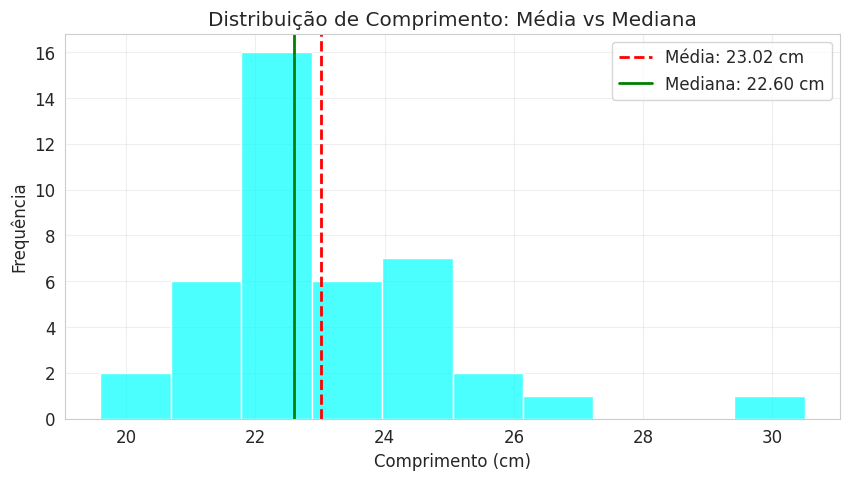

In [ ]:
# Visualização: Média vs Mediana de Comprimento (gráfico)
media = kids['Comprimento'].mean()
mediana = kids['Comprimento'].median()

plt.figure(figsize=(10, 5))
sns.histplot(data=kids, x='Comprimento', bins=10, alpha=0.7, color='cyan')
plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Média: {media:.2f} cm')
plt.axvline(mediana, color='green', linestyle='-', linewidth=2, label=f'Mediana: {mediana:.2f} cm')
plt.title('Distribuição de Comprimento: Média vs Mediana')
plt.xlabel('Comprimento (cm)')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Média vs Mediana em Comprimento

No contexto das medidas dos pés:
- A **média** resume o valor central, mas pode ser puxada se houver um valor muito grande (ex.: erro de digitação)
- A **mediana** mostra o valor típico sem ser afetada por extremos

Comparar as duas nos ajuda a verificar se a distribuição de `Comprimento` é equilibrada ou inclinada.

In [ ]:
# Calculando média e mediana de Largura
media_l = kids['Largura'].mean()
mediana_l = kids['Largura'].median()
print(f"Média de Largura: {media_l:.2f} cm")
print(f"Mediana de Largura: {mediana_l:.2f} cm")
print(f"Diferença: {abs(media_l - mediana_l):.2f} cm")

Média de Largura: 9.08 cm
Mediana de Largura: 9.00 cm
Diferença: 0.08 cm


# Análise Exploratória de Dados 2D: Investigando Relações

**Qual a relação de uma coisa com outra?**

Agora vamos aprender a investigar a relação entre duas variáveis ou "características" dos nossos dados. Isso é o que chamamos de Análise Exploratória de Dados (EDA) em 2D.

Imagine que temos uma lista com informações sobre alunos, como altura e peso. Será que alunos mais altos são também mais pesados? A análise 2D nos ajuda a responder perguntas como essa, encontrando padrões e relações nos dados.

Como vimos, para explorar relações de forma didática, usamos agora o dataset **kidsfeet**, pequeno (39 observações) e adequado para demonstrar:
- Distribuições simples
- Comparações entre grupos (meninos vs meninas)
- Relações entre medidas contínuas (Comprimento vs Largura)

Pergunta motivadora: "Existe relação entre o comprimento e a largura dos pés?" Também podemos investigar se o sexo está associado a diferenças nas medidas.

## **Analisando Dados Categóricos**

O objetivo desta análise é investigar a possível relação entre o sexo das crianças e qual pé foi medido. Essas variáveis são consideradas "categóricas", pois classificam os indivíduos em grupos específicos.

In [ ]:
pes = kids.copy()
print('Dataset kidsfeet disponível com', len(pes), 'linhas.')

Dataset kidsfeet disponível com 41 linhas.


### **Gráfico de Barras Agrupadas**

Este gráfico é bom para contagens, mas pode ser difícil comparar as categorias quando elas estão lado a lado.

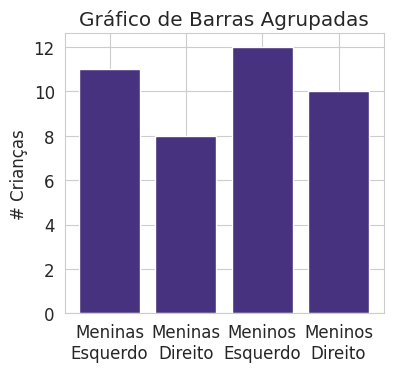

In [ ]:
# Primeiro, vamos criar as categorias que queremos analisar
# (Menina, Pé Esquerdo), (Menina, Pé Direito), (Menino, Pé Esquerdo), (Menino, Pé Direito)
categorias = [("G","L"), ("G","R"), ("B","L"), ("B","R")]

# Agora, vamos contar quantas crianças existem para cada categoria
dados = {}
for cat in categorias:
  dados[cat] = pes.Pe[(pes.Sexo == cat[0]) & (pes.Pe == cat[1])].count()

plt.figure(figsize=(14, 8))

# Gráfico 1: Barras Agrupadas
plt.subplot(2, 3, 1)
plt.bar(range(len(dados)), list(dados.values()), align='center')
plt.xticks(range(len(dados)), ['Meninas\nEsquerdo', 'Meninas\nDireito', 'Meninos\nEsquerdo', 'Meninos\nDireito'])
plt.ylabel("# Crianças")
plt.title("Gráfico de Barras Agrupadas")

plt.show()

Observe como é preciso "pular" as barras para comparar, por exemplo, o pé esquerdo de meninas com o de meninos

### **Gráfico de Barras Empilhadas**

Uma solução melhor é empilhar as barras. Assim, a comparação fica mais visual e direta.

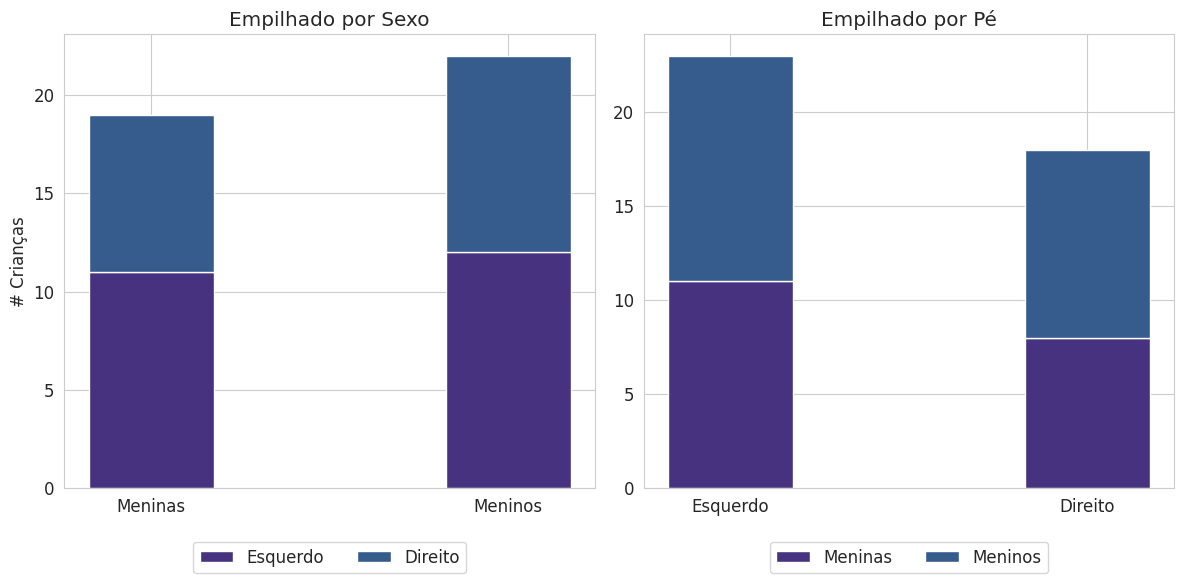

In [ ]:
# Criamos a figura para abrigar os gráficos
plt.figure(figsize=(12, 6))

# --- Gráfico 1 (à esquerda) ---
plt.subplot(1, 2, 1)
esquerdo = [dados[("G","L")], dados[("B","L")]]
direito = [dados[("G","R")], dados[("B","R")]]
plt.bar(range(2), esquerdo, label="Esquerdo", width=0.35)
plt.bar(range(2), direito, label="Direito", width=0.35, bottom=esquerdo)
plt.xticks(range(2), ["Meninas", "Meninos"])
plt.ylabel("# Crianças")
plt.title("Empilhado por Sexo")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

# --- Gráfico 2 (à direita) ---
plt.subplot(1, 2, 2)
meninas = [dados[("G","L")], dados[("G","R")]]
meninos = [dados[("B","L")], dados[("B","R")]]
plt.bar(range(2), meninas, label="Meninas", width=0.35)
plt.bar(range(2), meninos, label="Meninos", width=0.35, bottom=meninas)
plt.xticks(range(2), ["Esquerdo", "Direito"])
plt.title("Empilhado por Pé")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

plt.tight_layout()
plt.show()

Com as barras empilhadas, fica bem mais fácil visualizar e comparar as contagens

### **Gráfico de Setores (Pizza)**

Este tipo de gráfico é útil quando queremos ver a proporção de cada categoria no todo. No nosso caso, as 4 categorias formam 100% dos dados. No entanto, é difícil comparar o tamanho exato das "fatias", então use com moderação.

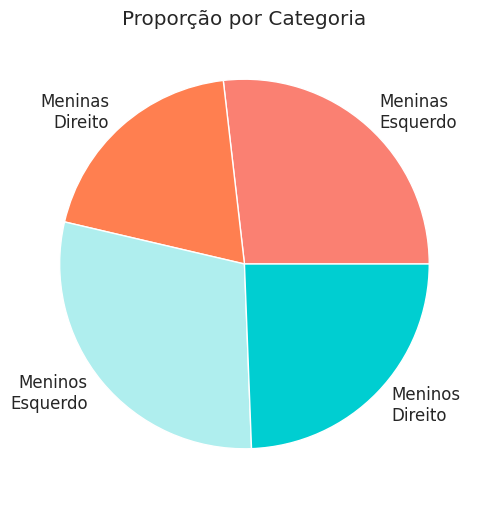

In [ ]:
plt.figure(figsize=(8, 6))

# Gráfico Pizza
plt.pie(list(dados.values()),
        labels=["Meninas\nEsquerdo", "Meninas\nDireito", "Meninos\nEsquerdo", "Meninos\nDireito"],
        colors=["salmon", "coral", "paleturquoise", "darkturquoise"])
plt.title("Proporção por Categoria")
plt.show()

### **Mapas de Calor (Heatmaps)**

Mapas de calor são excelentes para visualizar dados em formato de tabela, onde a cor de cada célula representa um valor. É uma forma muito visual de comparar múltiplas categorias ao mesmo tempo.

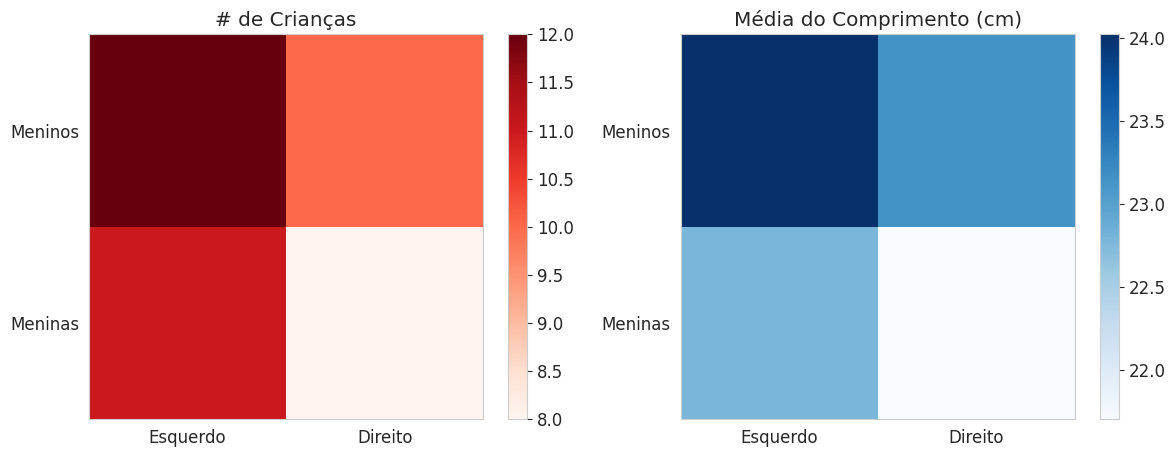

In [ ]:
plt.figure(figsize=(14, 5))

# Gráfico 5: Mapa de Calor da Contagem
plt.subplot(1, 2, 1)
dadosMatrizContagem = np.array(list(dados.values())).reshape(2, 2)
plt.pcolormesh(dadosMatrizContagem, cmap="Reds")
plt.yticks(np.arange(2) + 0.5, ["Meninas", "Meninos"])
plt.xticks(np.arange(2) + 0.5, ["Esquerdo", "Direito"])
plt.title("# de Crianças")
plt.colorbar()

# Média do comprimento do pé por categoria
dados_media = {}
for cat in categorias:
  dados_media[cat] = pes.Comprimento[(pes.Sexo == cat[0]) & (pes.Pe == cat[1])].mean()

# Gráfico 6: Mapa de Calor da Média do Comprimento
plt.subplot(1, 2, 2)
dadosMatrizMedia = np.array(list(dados_media.values())).reshape(2, 2)
plt.pcolormesh(dadosMatrizMedia, cmap="Blues")
plt.yticks(np.arange(2) + 0.5, ["Meninas", "Meninos"])
plt.xticks(np.arange(2) + 0.5, ["Esquerdo", "Direito"])
plt.title("Média do Comprimento (cm)")
plt.colorbar()

plt.show()

**Resumo:** Existe uma variedade de ferramentas para dados categóricos. Não há regras estritas de quando usar cada um, mas normalmente evita-se os gráficos de setores (ângulos são difícies de medir "no olho") e de barras 3D (barras podem esconder outras barras).

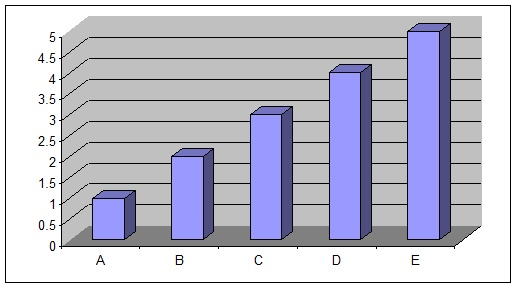

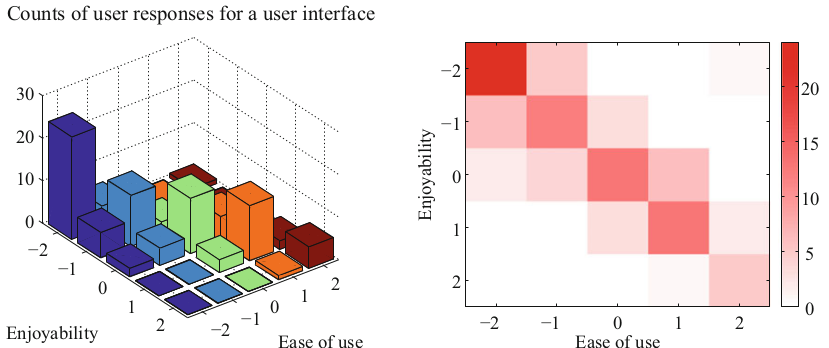

## **Gráficos de Dispersão e Correlação**

E quando queremos ver a relação entre duas variáveis numéricas, como o comprimento e a largura dos pés? Para isso, usamos o gráfico de dispersão (scatter plot).

### **O que é um Gráfico de Dispersão?**

É um gráfico onde cada ponto representa uma observação (no nosso caso, uma criança), posicionado de acordo com seus valores em dois eixos (x e y). Ele é perfeito para vermos se existe uma tendência ou padrão na relação entre as duas variáveis.

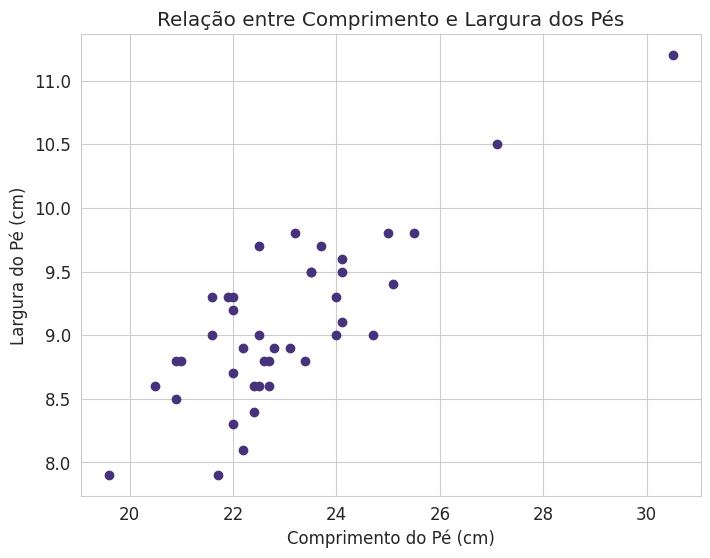

In [ ]:
# Criamos um gráfico de dispersão com o comprimento no eixo X e a largura no eixo Y
plt.figure(figsize=(8, 6))
plt.scatter(pes.Comprimento, pes.Largura)
plt.xlabel("Comprimento do Pé (cm)")
plt.ylabel("Largura do Pé (cm)")
plt.title("Relação entre Comprimento e Largura dos Pés")
plt.show()

Interpretação: Olhando para o gráfico, notamos que os pontos formam um padrão que sobe da esquerda para a direita. Isso indica que, em geral, pés mais compridos também são mais largos.

## **Medindo a Relação: Coeficiente de Correlação de Pearson (r)**

Podemos medir a força e a direção dessa relação linear com um número, chamado de Coeficiente de Correlação de Pearson, ou simplesmente r.



*   r perto de +1: Correlação positiva forte (quando um sobe, o outro sobe).
*   r perto de -1: Correlação negativa forte (quando um sobe, o outro desce).
*   r perto de 0: Não há correlação linear.









In [ ]:
# Calcula a correlação entre as duas colunas
correlacao = pes['Comprimento'].corr(pes['Largura'])


print(f"O coeficiente de correlação de Pearson (r) é: {correlacao:.4f}")

O coeficiente de correlação de Pearson (r) é: 0.8019


Agora, vamos gerar um gráfico de dispersão para visualizar essa relação.

## **A Direção da Relação (O Sinal de r)**

O sinal do coeficiente r (positivo ou negativo) nos diz para onde a relação aponta. Isso é visualmente representado pela inclinação da linha de tendência no gráfico.
*  Sinal Positivo (+): Indica uma correlação positiva. No gráfico, isso se traduz em uma linha de tendência que sobe da esquerda para a direita. Quando uma variável aumenta, a outra também tende a aumentar.
*   Sinal Negativo (-): Indica uma correlação negativa. No gráfico, a linha de tendência desce da esquerda para a direita. Quando uma variável aumenta, a outra tende a diminuir.

## **A Força da Relação (O Valor de r)**

O valor absoluto de r (o quão perto ele está de 1 ou -1) nos diz o quão forte é a relação linear. Isso é visualmente representado pela dispersão dos pontos em torno da linha de tendência.



*  Valor perto de 1 ou -1 (Forte): A relação é forte. No gráfico, os pontos estão bem agrupados e próximos da linha de tendência.
*  Valor perto de 0 (Fraca): A relação é fraca ou inexistente. No gráfico, os pontos estão muito espalhados e distantes da linha de tendência.

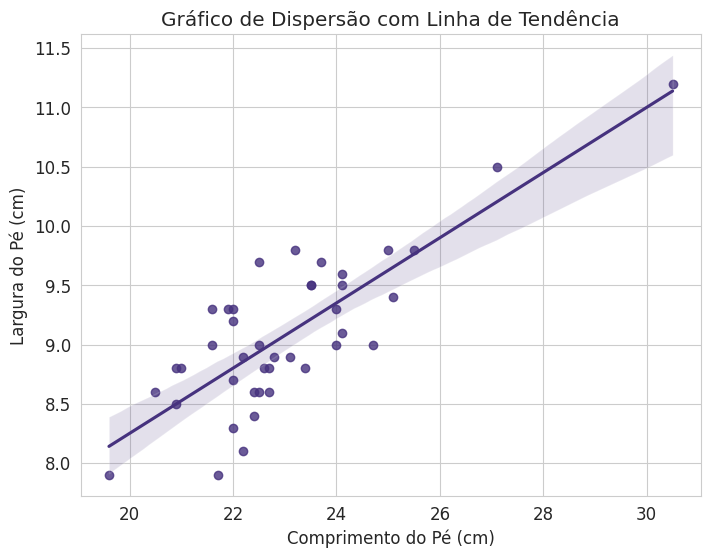

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x="Comprimento", y="Largura", data=pes)
plt.xlabel("Comprimento do Pé (cm)")
plt.ylabel("Largura do Pé (cm)")
plt.title("Gráfico de Dispersão com Linha de Tendência")
plt.show()

### **Adicionando uma Terceira Dimensão com Cor**
Podemos enriquecer nosso gráfico de dispersão adicionando uma terceira variável, desta vez categórica (como o sexo), usando cores diferentes para cada categoria.

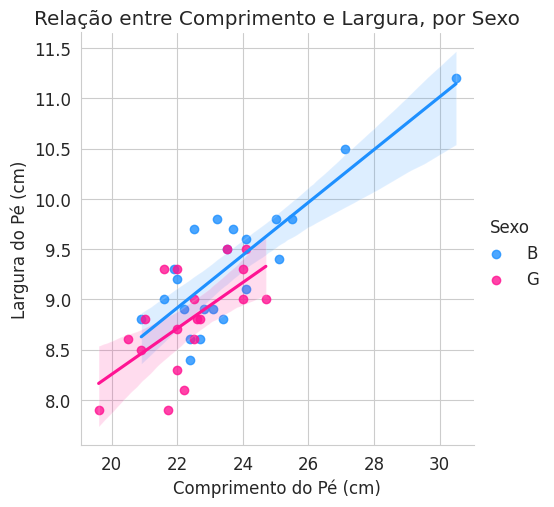

In [ ]:
# A função lmplot cria o gráfico, usando a coluna 'Sex' para a cor (hue)
# Adicionamos o argumento 'palette' para definir as cores manualmente
sns.lmplot(x="Comprimento",
           y="Largura",
           hue="Sexo",
           data=pes,
           # Aqui definimos um dicionário de cores:
           # A categoria 'B' (Boy) será azul e a 'G' (Girl) será rosa.
           palette={"B": "dodgerblue", "G": "deeppink"})

plt.xlabel("Comprimento do Pé (cm)")
plt.ylabel("Largura do Pé (cm)")
plt.title("Relação entre Comprimento e Largura, por Sexo")
plt.show()

Agora podemos ver as tendências para meninos (B) e meninas (G) separadamente. Parece que a relação é semelhante para ambos, mas os pés dos meninos tendem a ser um pouco maiores em ambas as dimensões.

## **Correlação NÃO Implica Causalidade!**
Este é um dos conceitos mais importantes em análise de dados! Só porque duas variáveis estão correlacionadas, não significa que uma CAUSA a outra, ou ainda, que uma DEPENDE da outra.

Exemplo clássico: O consumo de sorvete e o número de afogamentos em uma cidade são positivamente correlacionados (quando um aumenta, o outro também). Isso significa que tomar sorvete causa afogamentos? Não! A verdadeira causa é o verão (uma terceira variável). No verão, as pessoas tomam mais sorvete e também nadam mais, o que aumenta a chance de afogamentos.

Correlações podem acontecer por:



*   Acidente: pequenos conjuntos de observações podem parecer correlacionados
*   Identidade: a variável A pode ser computada diretamente da variável B
*   Relação causal direta: há relação entre velocidade e deslocamento de um veículo
*   Relação causal implícita: pode haver uma variável latente que seja a causa das mudanças em ambas as variáveis

Exemplo: A idade da criança é a variável latente, crianças mais jovens tendem a ter pés pequenos e menor capacidade de leitura (já que tem menos prática). Crianças de mais idade tendem a ter pés maiores e maior capacidade de leitura (tem mais tempo praticando).

# O Projeto

O projeto será executado em duplas. Seu objetivo é carregar os dados em um Notebook e realizar análises dos dados em busca de explicações para a variável "stress_level", identificando quais fatores acadêmicos, sociais, emocionais e de saúde são os indicadores mais significativos para determinar o nível de estresse do aluno.

### Os dados

Nós analisaremos os conjuntos de dados de monitoramento de estresse do aluno

Compreendendo as causas subjacentes para o stress e seu impacto nos alunos de hoje.

O presente conjunto de dados investiga as causas do estresse entre estudantes de escolas americanas. Ele busca compreender os fatores psicológicos, fisiológicos, ambientais, acadêmicos e sociais que influenciam o nível de estresse dos alunos.

**Número de variáveis (colunas)**: 21

**Variável alvo**: `stress_level`. Nível de estresse categórico reportado pelo estudante. Esta variável é medida em uma escala de 3 pontos:
*   0:   Baixo/Normal
*   1:   Moderado
*   2:   Alto

**Tipos de dados**: numéricos.
Todas as variáveis a seguir foram organizadas em cinco categorias principais:

- **Fatores Psicológicos**
    - `anxiety_level`: intensidade da ansiedade. (Escala numérica de 0, menos ansioso, a 30, mais ansioso.)
    - `self_esteem`: nível de autoestima. (Escala numérica de 0 a 30.)
    - `mental_health_history`: histórico de saúde mental (Escala binária: 0 = não, 1 = sim).
    - `depression`: grau de sintomas depressivos. (Escala numérica de 0 a 30.)

- **Fatores Fisiológicos**
    - `blood_pressure`: alterações de pressão arterial. (Escala com 3 níveis: 0 (Normal), 1 (Elevada), 2 (Alta).)

As demais variáveis foram medidas utilizando uma escala Likert de 5 pontos, que representa a frequência ou intensidade de cada fator. A escala é:
*   0: Nunca
*   1: Raramente
*   2: Às vezes
*   3: Frequentemente
*   4: Sempre

- **Fatores Fisiológicos**
    - `headache`: frequência de dores de cabeça.
    - `sleep_quality`: qualidade do sono.
    - `breathing_problem`: problemas respiratórios.

- **Fatores Ambientais**
    - `noise_level`: nível de ruído no ambiente.
    - `living_conditions`: condições de moradia.
    - `safety`: percepção de segurança.
    - `basic_needs`: atendimento das necessidades básicas.

- **Fatores Acadêmicos**
    - `academic_performance`: desempenho escolar.
    - `study_load`: carga de estudos.
    - `teacher_student_relationship`: qualidade da relação com professores.
    - `future_career_concerns`: preocupações com a carreira futura.

- **Fatores Sociais**
    - `social_support`: nível de suporte social.
    - `peer_pressure`: pressão dos colegas.
    - `extracurricular_activities`: envolvimento em atividades extracurriculares.
    - `bullying`: experiências de bullying.

**Possibilidades de Análise**
- Identificar quais categorias têm maior impacto no estresse estudantil.
- Verificar relações entre desempenho acadêmico, saúde mental e apoio social.